In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('./脑电波数据/A3.csv',encoding= 'gbk')
data

,日期,时间,脑电连接信号是否正常,专注度,放松度,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2
0,06/02/2024,18:40:39,0,61,87,80793,100604,24261,13689,19992,7373,4993,2526
1,06/02/2024,18:40:40,0,56,78,4506,12509,16971,4907,15563,14149,13124,9095
2,06/02/2024,18:40:41,0,56,64,18415,32313,10493,8803,20344,15895,25649,2224
3,06/02/2024,18:40:42,0,56,63,70102,48516,16458,15464,14782,6991,7041,4314
4,06/02/2024,18:40:43,0,75,66,323513,64147,30723,6379,17509,21416,17370,1815
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,06/02/2024,18:43:54,0,67,51,8297,3320,10978,9897,5314,2694,2645,817
196,06/02/2024,18:43:55,0,60,70,24573,4121,11987,20844,2337,4236,3377,1350
197,06/02/2024,18:43:56,0,77,69,5591,28638,11111,36695,11055,10192,3812,1767
198,06/02/2024,18:43:57,0,66,75,3002,20266,9242,18978,3210,3478,2995,1663


In [3]:
mask = data['脑电连接信号是否正常'] != 0
# 使用布尔索引删除这些行
df = data[~mask]
df =df.reset_index(drop=True)
df

,日期,时间,脑电连接信号是否正常,专注度,放松度,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2
0,06/02/2024,18:40:39,0,61,87,80793,100604,24261,13689,19992,7373,4993,2526
1,06/02/2024,18:40:40,0,56,78,4506,12509,16971,4907,15563,14149,13124,9095
2,06/02/2024,18:40:41,0,56,64,18415,32313,10493,8803,20344,15895,25649,2224
3,06/02/2024,18:40:42,0,56,63,70102,48516,16458,15464,14782,6991,7041,4314
4,06/02/2024,18:40:43,0,75,66,323513,64147,30723,6379,17509,21416,17370,1815
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,06/02/2024,18:43:54,0,67,51,8297,3320,10978,9897,5314,2694,2645,817
196,06/02/2024,18:43:55,0,60,70,24573,4121,11987,20844,2337,4236,3377,1350
197,06/02/2024,18:43:56,0,77,69,5591,28638,11111,36695,11055,10192,3812,1767
198,06/02/2024,18:43:57,0,66,75,3002,20266,9242,18978,3210,3478,2995,1663


In [76]:
# 最值归一化
cols_to_scale = df.iloc[:, 5:13]  # 选择第6到第13列
scaler = MinMaxScaler(feature_range=(-1, 1), copy=True)
scaler.fit(cols_to_scale)
scaled_features = scaler.transform(cols_to_scale)
df_MinMax = pd.DataFrame(data=scaled_features, columns=["Delta","Theta","Alpha1","Alpha2","Beta1",
                                                       "Beta2","Gamma1","Gamma2"])
df_MinMax

,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2
0,-0.883042,-0.671478,-0.627580,-0.904577,-0.607708,-0.648438,-0.618619,-0.586829
1,-0.994452,-0.968969,-0.740825,-0.970267,-0.699182,-0.286569,0.018532,0.511115
2,-0.974139,-0.902093,-0.841456,-0.941125,-0.600438,-0.193324,1.000000,-0.637306
3,-0.898655,-0.847376,-0.748794,-0.891300,-0.715312,-0.668838,-0.458136,-0.287983
4,-0.528573,-0.794591,-0.527197,-0.959256,-0.658990,0.101522,0.351252,-0.705666
...,...,...,...,...,...,...,...,...
195,-0.988916,-1.000000,-0.833922,-0.932941,-0.910860,-0.898318,-0.802609,-0.872472
196,-0.965146,-0.997295,-0.818248,-0.851057,-0.972345,-0.815968,-0.745249,-0.783386
197,-0.992867,-0.914503,-0.831856,-0.732491,-0.792288,-0.497891,-0.711162,-0.713689
198,-0.996648,-0.942774,-0.860890,-0.865015,-0.954315,-0.856449,-0.775183,-0.731071


In [7]:
other_df = df.drop(df.columns[5:13], axis=1)
other_df

,日期,时间,脑电连接信号是否正常,专注度,放松度
0,06/02/2024,18:40:39,0,61,87
1,06/02/2024,18:40:40,0,56,78
2,06/02/2024,18:40:41,0,56,64
3,06/02/2024,18:40:42,0,56,63
4,06/02/2024,18:40:43,0,75,66
...,...,...,...,...,...
195,06/02/2024,18:43:54,0,67,51
196,06/02/2024,18:43:55,0,60,70
197,06/02/2024,18:43:56,0,77,69
198,06/02/2024,18:43:57,0,66,75


In [8]:
other_df = df.drop(df.columns[5:13], axis=1)
merged_df=pd.concat([other_df, df_MinMax],axis=1)
merged_df

,日期,时间,脑电连接信号是否正常,专注度,放松度,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2
0,06/02/2024,18:40:39,0,61,87,-0.883042,-0.671478,-0.627580,-0.904577,-0.607708,-0.648438,-0.618619,-0.586829
1,06/02/2024,18:40:40,0,56,78,-0.994452,-0.968969,-0.740825,-0.970267,-0.699182,-0.286569,0.018532,0.511115
2,06/02/2024,18:40:41,0,56,64,-0.974139,-0.902093,-0.841456,-0.941125,-0.600438,-0.193324,1.000000,-0.637306
3,06/02/2024,18:40:42,0,56,63,-0.898655,-0.847376,-0.748794,-0.891300,-0.715312,-0.668838,-0.458136,-0.287983
4,06/02/2024,18:40:43,0,75,66,-0.528573,-0.794591,-0.527197,-0.959256,-0.658990,0.101522,0.351252,-0.705666
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,06/02/2024,18:43:54,0,67,51,-0.988916,-1.000000,-0.833922,-0.932941,-0.910860,-0.898318,-0.802609,-0.872472
196,06/02/2024,18:43:55,0,60,70,-0.965146,-0.997295,-0.818248,-0.851057,-0.972345,-0.815968,-0.745249,-0.783386
197,06/02/2024,18:43:56,0,77,69,-0.992867,-0.914503,-0.831856,-0.732491,-0.792288,-0.497891,-0.711162,-0.713689
198,06/02/2024,18:43:57,0,66,75,-0.996648,-0.942774,-0.860890,-0.865015,-0.954315,-0.856449,-0.775183,-0.731071


In [29]:
data.iloc[:, 3:13]

,专注度,放松,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2
0,78,51,539944,15807,1827,5839,6493,1121,417,189
1,51,44,102340,134788,9470,13372,11316,2417,1533,1689
2,53,61,1162988,28209,28336,8392,15695,5234,2635,1399
3,50,67,926490,157242,60541,40168,38635,29760,16347,5620
4,63,87,1322740,17367,28833,10425,7966,4284,677,481
...,...,...,...,...,...,...,...,...,...,...
195,63,44,26104,66225,5343,6422,17550,8295,3188,3660
196,51,41,973919,210375,29190,5112,11287,5974,2877,1641
197,41,43,264430,184054,33257,1238,2568,3382,1943,616
198,48,53,125780,24779,19524,5117,3708,4024,4098,3992


In [10]:
df_col = merged_df.iloc[:,5:13]
df_col

,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2
0,-0.883042,-0.671478,-0.627580,-0.904577,-0.607708,-0.648438,-0.618619,-0.586829
1,-0.994452,-0.968969,-0.740825,-0.970267,-0.699182,-0.286569,0.018532,0.511115
2,-0.974139,-0.902093,-0.841456,-0.941125,-0.600438,-0.193324,1.000000,-0.637306
3,-0.898655,-0.847376,-0.748794,-0.891300,-0.715312,-0.668838,-0.458136,-0.287983
4,-0.528573,-0.794591,-0.527197,-0.959256,-0.658990,0.101522,0.351252,-0.705666
...,...,...,...,...,...,...,...,...
195,-0.988916,-1.000000,-0.833922,-0.932941,-0.910860,-0.898318,-0.802609,-0.872472
196,-0.965146,-0.997295,-0.818248,-0.851057,-0.972345,-0.815968,-0.745249,-0.783386
197,-0.992867,-0.914503,-0.831856,-0.732491,-0.792288,-0.497891,-0.711162,-0.713689
198,-0.996648,-0.942774,-0.860890,-0.865015,-0.954315,-0.856449,-0.775183,-0.731071


In [11]:
#计算相关系数
df_col = merged_df.iloc[:,5:13]
correlation_matrix = df_col.corr()
print(correlation_matrix)

           Delta     Theta    Alpha1    Alpha2     Beta1     Beta2    Gamma1  \
Delta   1.000000  0.468115  0.135906 -0.013983  0.127212  0.208194  0.052929   
Theta   0.468115  1.000000  0.174108  0.038528  0.256831  0.397991  0.165412   
Alpha1  0.135906  0.174108  1.000000  0.279834  0.235087  0.341079  0.105406   
Alpha2 -0.013983  0.038528  0.279834  1.000000  0.131928  0.185233  0.125502   
Beta1   0.127212  0.256831  0.235087  0.131928  1.000000  0.386228  0.362888   
Beta2   0.208194  0.397991  0.341079  0.185233  0.386228  1.000000  0.499058   
Gamma1  0.052929  0.165412  0.105406  0.125502  0.362888  0.499058  1.000000   
Gamma2  0.053313  0.184761  0.210662  0.220698  0.301734  0.407083  0.497098   

          Gamma2  
Delta   0.053313  
Theta   0.184761  
Alpha1  0.210662  
Alpha2  0.220698  
Beta1   0.301734  
Beta2   0.407083  
Gamma1  0.497098  
Gamma2  1.000000  


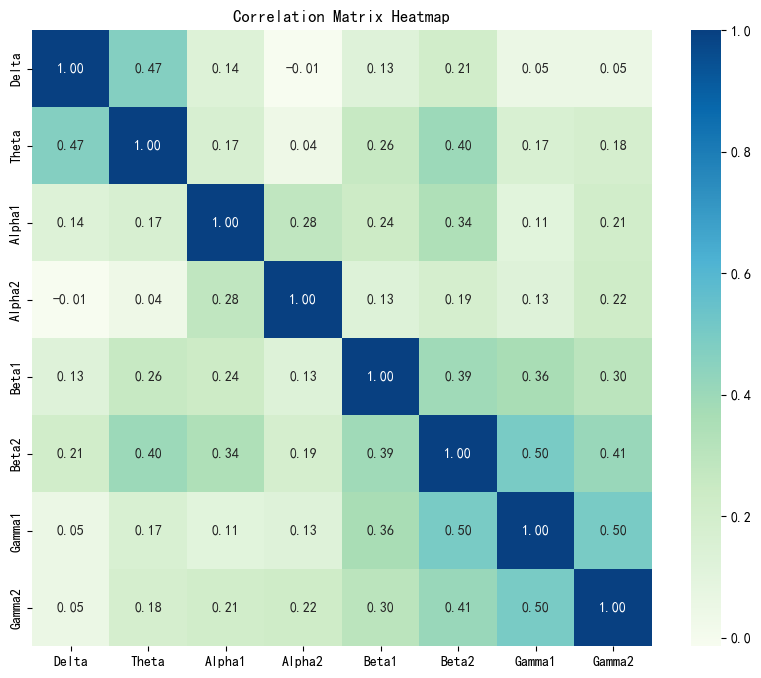

In [12]:
#绘制相关性热力图
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.font_manager import FontProperties

# 设置中文字体路径，例如使用'SimHei'字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

# 假设df是你的DataFrame，correlation_matrix是相关系数矩阵
correlation_matrix = df_col.corr()

# 使用seaborn的heatmap函数绘制热力图
plt.figure(figsize=(10, 8))  # 可以根据需要调整图形大小
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='GnBu', cbar=True)
plt.title('Correlation Matrix Heatmap')  # 标题
plt.show()

In [13]:
import pandas as pd
from sklearn.cluster import KMeans

# 假设df是包含时间序列数据的DataFrame

# 转置数据
df_transposed = df_col.T
df_transposed

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Delta,-0.883042,-0.994452,-0.974139,-0.898655,-0.528573,-0.125942,-0.468023,-0.732022,1.000000,-0.905849,...,-0.986636,-0.985711,-0.970025,-0.956686,-0.941397,-0.988916,-0.965146,-0.992867,-0.996648,-0.971226
Theta,-0.671478,-0.968969,-0.902093,-0.847376,-0.794591,-0.285771,-0.664113,-0.953608,-0.883006,-0.982845,...,-0.924563,-0.952466,-0.928605,-0.821488,-0.965184,-1.000000,-0.997295,-0.914503,-0.942774,-0.967902
Alpha1,-0.627580,-0.740825,-0.841456,-0.748794,-0.527197,0.924690,-0.733260,-0.967922,-0.966337,-0.953335,...,-0.529278,-0.829107,-0.903439,-0.103358,-0.932395,-0.833922,-0.818248,-0.831856,-0.860890,0.003037
Alpha2,-0.904577,-0.970267,-0.941125,-0.891300,-0.959256,-0.770370,-0.900665,-0.965921,-0.962877,-0.976602,...,-0.738064,-0.693969,-0.957947,-0.822177,-0.941865,-0.932941,-0.851057,-0.732491,-0.865015,-0.907390
Beta1,-0.607708,-0.699182,-0.600438,-0.715312,-0.658990,-0.348693,-0.570614,-0.990066,-0.897869,-0.747284,...,-0.922921,-0.792081,-0.769693,-0.850737,-0.805052,-0.910860,-0.972345,-0.792288,-0.954315,-0.894254
Beta2,-0.648438,-0.286569,-0.193324,-0.668838,0.101522,1.000000,-0.558451,-0.833218,-0.862644,-0.553965,...,-0.813565,-0.765554,-0.494686,-0.879252,-0.689025,-0.898318,-0.815968,-0.497891,-0.856449,-0.711242
Gamma1,-0.618619,0.018532,1.000000,-0.458136,0.351252,-0.372409,-0.792109,-0.805039,-0.792266,-0.732555,...,-0.878463,-0.776985,-0.690475,-0.897426,-0.898445,-0.802609,-0.745249,-0.711162,-0.775183,-0.733730
Gamma2,-0.586829,0.511115,-0.637306,-0.287983,-0.705666,0.242855,-0.702156,-0.946849,-0.704329,-0.644326,...,-0.585994,-0.828681,-0.893699,-0.721377,-0.753301,-0.872472,-0.783386,-0.713689,-0.731071,-0.663212


c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1

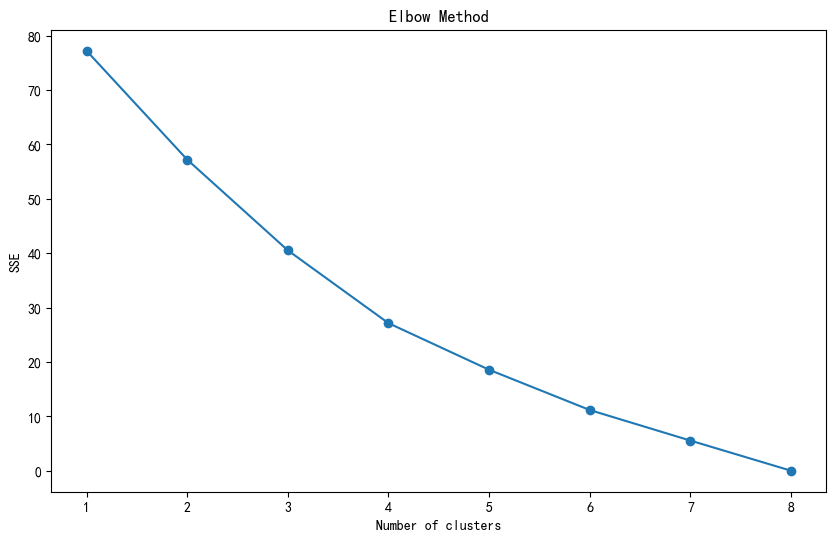

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 存储每个K值的SSE
sse = []

# 尝试不同的K值
for k in range(1, 9):  # 从K=2到K=10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_transposed)
    sse.append(kmeans.inertia_)


# 绘制肘部法则图
plt.figure(figsize=(10, 6))
plt.plot(range(1, 9), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [15]:
# 存储每个K值的SSE
sse = []

# 尝试不同的K值
for k in range(2, 11):  # 从K=2到K=10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_col)
    sse.append(kmeans.inertia_)  # 存储每个K值的SSE

# 计算SSE的一阶差分
diff_sse = np.diff(sse)

# 寻找SSE下降速率显著减缓的位置，即diff_sse的最小值
optimal_k_index = np.argmin(diff_sse)

# 转换为K值（因为diff_sse是从2开始的，所以需要+1）
optimal_k = optimal_k_index + 2
print(f"Optimal K value based on the elbow method: {optimal_k}")
optimal_k

Optimal K value based on the elbow method: 2


c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1

2

Silhouette Score:  0.36102120679200483


In [18]:
# 存储每个K值的SSE
sse = []

# 尝试不同的K值
for k in range(2, 9):  # 从K=2到K=10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_transposed)
    sse.append(kmeans.inertia_)  # 存储每个K值的SSE

# 计算SSE的一阶差分
diff_sse = np.diff(sse)

# 寻找SSE下降速率显著减缓的位置，即diff_sse的最小值
optimal_k_index = np.argmin(diff_sse)

# 转换为K值（因为diff_sse是从2开始的，所以需要+1）
optimal_k = optimal_k_index+2
print(f"Optimal K value based on the elbow method: {optimal_k}")
optimal_k

Optimal K value based on the elbow method: 2


c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1

2

In [59]:
# 4. 应用K-means聚类算法
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit_predict(df_transposed)
clusters = kmeans.labels_  # 获取聚类标签
clusters

c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 1, 1, 1, 1, 1, 1])

In [62]:
# 5. 评估聚类效果
silhouette_avg = silhouette_score(df_transposed, clusters)
print("Silhouette Score: ", silhouette_avg)

Silhouette Score:  0.13489835005215345


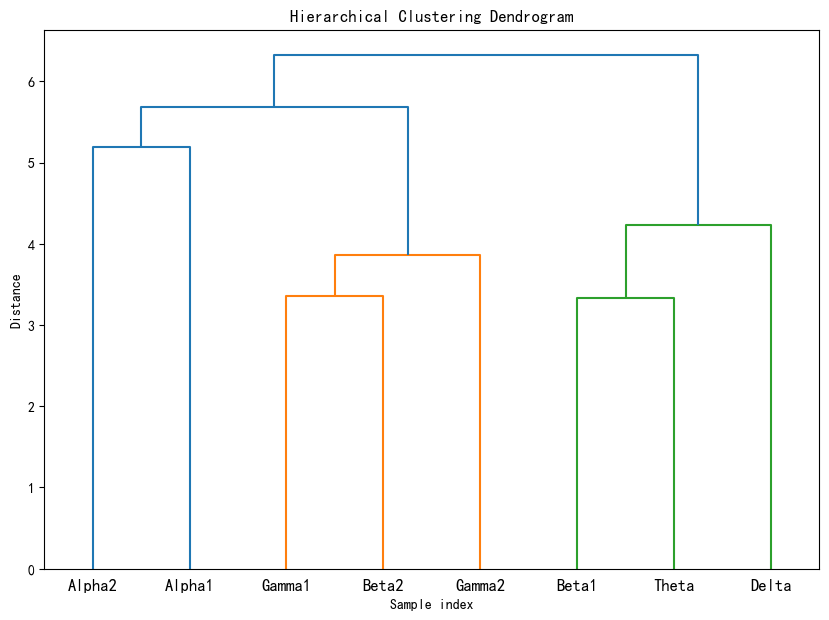

In [23]:
from scipy.cluster.hierarchy import linkage, dendrogram
# 应用层次聚类算法
# method='ward'是一种常用的凝聚方法，distance.p='euclidean'指定使用欧氏距离
Z = linkage(df_transposed, method='ward', metric='euclidean')
# 绘制树状图
plt.figure(figsize=(10, 7))
time_series_names = ["Delta","Theta","Alpha1","Alpha2","Beta1","Beta2","Gamma1","Gamma2"]
dendrogram(Z, orientation='top', labels=time_series_names, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_24396\1705998259.py:16: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dtw_matrix, method='average')  # 使用平均链接方法


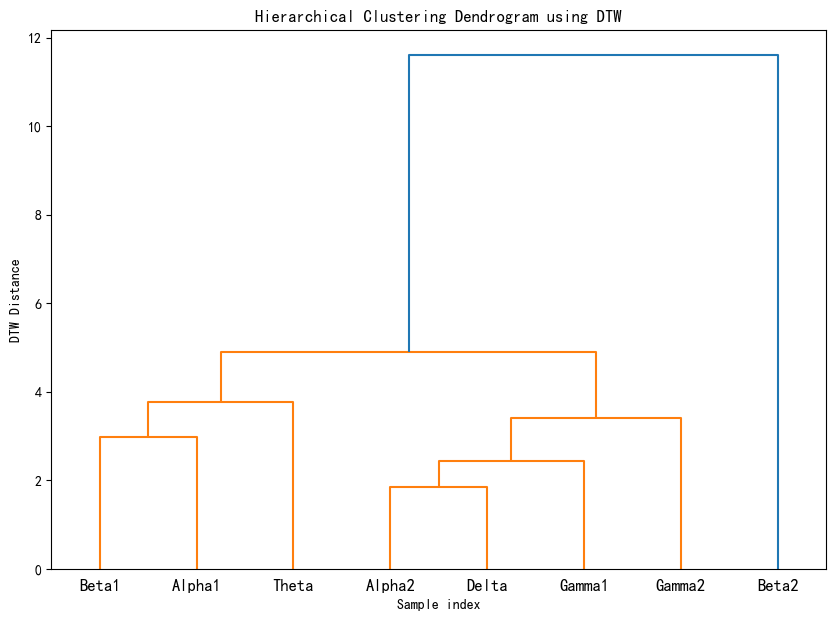

In [25]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from fastdtw import fastdtw

# 假设time_series_data是一个包含时间序列数据的数组或列表的列表

# 计算DTW距离矩阵
dtw_matrix = np.zeros((len(df_transposed), len(df_transposed)))
for i in range(len(df_transposed)):
    for j in range(i + 1, len(df_transposed)):
        distance = fastdtw(df_transposed[i], df_transposed[j])[0]
        dtw_matrix[i, j] = distance
        dtw_matrix[j, i] = distance  # 由于矩阵是对称的，复制距离值

# 应用层次聚类算法
Z = linkage(dtw_matrix, method='average')  # 使用平均链接方法

# 绘制树状图
plt.figure(figsize=(10, 7))
time_series_names = ["Delta","Theta","Alpha1","Alpha2","Beta1","Beta2","Gamma1","Gamma2"]
dendrogram(Z, orientation='top', labels=time_series_names, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram using DTW')
plt.xlabel('Sample index')
plt.ylabel('DTW Distance')
plt.show()

In [26]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

# 假设Z是linkage函数返回的链接矩阵
# 尝试不同的聚类数目
silhouette_scores = []
for k in range(2, len(df_transposed)):
    # 从链接矩阵生成聚类标签
    clusters = fcluster(Z, k, criterion='maxclust')
    # 计算轮廓系数
    score = silhouette_score(dtw_matrix, clusters)
    silhouette_scores.append(score)

# 选择具有最高轮廓系数的聚类数目
best_k = np.argmax(silhouette_scores) + 2  # 加2是因为索引和k的起始值
print(f"最佳聚类数目: {best_k}")

最佳聚类数目: 2


In [4]:
cols_to_scale = df.iloc[:, 5:13]  # 选择第6到第13列
df_transposed = cols_to_scale.T
df_transposed

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Delta,80793,4506,18415,70102,323513,599211,364974,184203,1370191,65176,...,9858,10491,21232,30366,40835,8297,24573,5591,3002,20410
Theta,100604,12509,32313,48516,64147,214822,102785,17058,37965,8400,...,25659,17396,24462,56182,13630,3320,4121,28638,20266,12825
Alpha1,24261,16971,10493,16458,30723,124186,17458,2352,2454,3291,...,30589,11288,6503,58007,4639,10978,11987,11111,9242,64856
Alpha2,13689,4907,8803,15464,6379,31631,14212,5488,5895,4060,...,35950,41845,6554,24705,8704,9897,20844,36695,18978,13313
Beta1,19992,15563,20344,14782,17509,32533,21788,1479,5943,13234,...,4730,11065,12149,8225,10437,5314,2337,11055,3210,6118
Beta2,7373,14149,15895,6991,21416,38240,9058,3913,3362,9142,...,4281,5180,10252,3051,6613,2694,4236,10192,3478,6197
Gamma1,4993,13124,25649,7041,17370,8135,2779,2614,2777,3539,...,1677,2972,4076,1435,1422,2645,3377,3812,2995,3524
Gamma2,2526,9095,2224,4314,1815,7490,1836,372,1823,2182,...,2531,1079,690,1721,1530,817,1350,1767,1663,2069


In [44]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.metrics import dtw_path

scaler = TimeSeriesScalerMeanVariance()
X_train = scaler.fit_transform(df_transposed)

# 假设 X 是你的数据集，每行是一个时间序列
n_clusters = 2 # 想要的聚类数目
time_series_kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric='dtw', random_state=42)
time_series_kmeans.fit(X_train)
clusters = time_series_kmeans.labels_ 
clusters

array([0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [12]:
X_train

array([[[-0.09618107],
        [-0.50054289],
        [-0.42681776],
        ...,
        [-0.49479181],
        [-0.50851489],
        [-0.4162432 ]],

       [[ 1.20830563],
        [-0.38255807],
        [-0.0249275 ],
        ...,
        [-0.0912925 ],
        [-0.24247827],
        [-0.37685158]],

       [[ 0.37864755],
        [-0.01224142],
        [-0.35959104],
        ...,
        [-0.32645395],
        [-0.42666952],
        [ 2.55534683]],

       ...,

       [[ 0.2879237 ],
        [ 1.81980315],
        [ 2.21452887],
        ...,
        [ 0.92522715],
        [-0.59263569],
        [ 0.02206033]],

       [[ 0.74128477],
        [ 3.65526171],
        [ 8.1439545 ],
        ...,
        [ 0.31803956],
        [ 0.02524419],
        [ 0.21482651]],

       [[ 0.43209667],
        [ 4.62310329],
        [ 0.23942138],
        ...,
        [-0.05214355],
        [-0.11849531],
        [ 0.14053174]]])

In [8]:

from sklearn.metrics import silhouette_score
# 5. 评估聚类效果
silhouette_avg = silhouette_score(X_train, clusters)
print("Silhouette Score: ", silhouette_avg)

ValueError: Found array with dim 3. None expected <= 2.

In [68]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_transposed)
clusters = kmeans.labels_  # 获取聚类标签
clusters

c:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 1, 2, 1, 1, 1, 1])

In [73]:
silhouette_avg = silhouette_score(df_transposed, clusters)
print("Silhouette Score: ", silhouette_avg)

Silhouette Score:  0.13306409606406128
